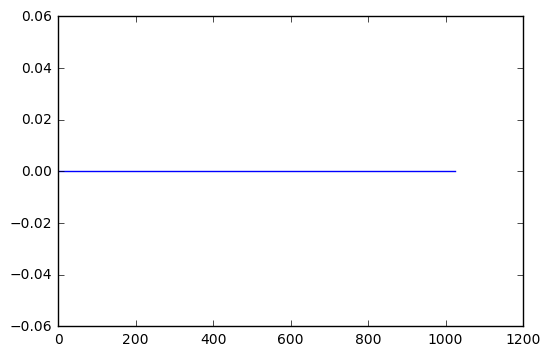

In [3]:
import numpy as np
import scipy as sp
import scipy.fftpack as spfft

def hanning(winlen):
    if winlen%2 == 0:
        winlen = winlen + 1
        hwin = 0.5*(1-np.cos(2*np.pi*np.arange(winlen))/(winlen-1))
        hwin = hwin[0:winlen-1]
    else:
        hwin = 0.5*(1-np.cos(2*np.pi*np.arange(winlen))/(winlen-1))
    
    return hwin

def stft(x, fftlen, winlen, shift):
    start = 0
    end = len(x)

    nFrame = int((end-winlen)/shift + 1)

    Xst = np.empty([fftlen, nFrame], dtype=np.complex)

    #win = np.hanning(winlen) #window function
    win = hanning(winlen)

    for frame in range(0, nFrame, 1):
        temp = win * x[frame*shift:frame*shift+winlen].T
        Xst[:, frame] = spfft.fft(temp, fftlen)
    return Xst

def istft(Xst, shift):
    [fftlen, nFrame] = Xst.shape
    out_len = (nFrame-1) * shift + fftlen

    x = np.zeros(out_len)
    
    for frame in range(0, nFrame, 1):
        x_tmp = spfft.ifft(Xst[:, frame])
        
        sp = frame * shift
        ep = sp + fftlen
               
        x[sp:ep] = x[sp:ep] + x_tmp.real
        
    return x


if __name__ == '__main__':
    import wavio
    import matplotlib.pyplot as plt
    
    wav = wavio.read("sine_-06_05_00080.wav")
    fs = wav.rate
    x_in = wav.data

    fftlen = 1024
    winlen = 512
    shift  = 256

    Xst_in = stft(x_in, fftlen, winlen, shift)
    
    amp_Xst_in = abs(Xst_in)
    
    x_out = istft(Xst_in, shift)

    #plt.plot(x_out)
    plt.plot(amp_Xst_in[:,0])
    plt.show()